### **Schritt 1: *Bibliotheken importieren***

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets as skdata
from sklearn import model_selection as skmodel
from sklearn.model_selection import GridSearchCV

### **Schritt 2: *Benötigte Daten laden***

In [2]:
california = skdata.fetch_california_housing()

# Daten in eine Tabelle einfügen
california_df = (
    pd.DataFrame(data = california.data, columns = california.feature_names)
)

# Einfügen der Target Spalte in die Tabelle
california_df[california.target_names[0]] = california.target


### **Schritt 3: *Grobe Betrachtung der Datenstruktur***

In [3]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### **Schritt 4: Data Cleaning**
#### **Anmerkung**: 
##### - In diesem Schritt werden einige Datenpunkte -meistens die Ausreißer- entfernt, damit das Modell besser generalisert werden kann
##### - Wir lassen diesen Schritt aber erstmal raus, da wir zunächst die Grundlagen umsetzen wollen

### **Schritt 5: *Daten in Training und Test aufteilen***
#### **Anmerkungen**: 
- Verwendung von train_test_split aus scikit Bibliothek
    - Aufteilung in Training/Test: 80 / 20
    - random_state: sorgt dafür, dass die selben zufälligen Werte beibehalten werden 
    - stratify: hat was mit cross validation zu tun, also dass Werte in gleich große Gruppen aufgeteilt werden

In [4]:
# mit .values wird ein np.array erstellt
data_features = california_df.iloc[:, :-1].values # wir nehmen Spalte 0, ..., vorletzte Spalte 
data_target = california_df.iloc[:,-1].values # wir nehmen hier nur die letzte Spalte 


# Hier splitten wir die Daten in Training und Test
x_train, x_test, y_train, y_test = skmodel.train_test_split(data_features, data_target, train_size=0.8, random_state=42)

### **Schritt 6: *Aufruf der Methode, die ihr für die Daten nutzen wollt***
- Support Vector Regression
- KNeighborsRegressor
- DecisionTreeRegressor


In [5]:
support_vector_regression = svm.SVR() # Für meine Anwendung

### **Schritt 7: *Definiere die Hyperparameter, die optimiert werden sollen***
#### **Bei SVR:** C, epsilon, gamma
#### **Bei DecisionTreeRegressor:** max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes usw. 
#### **Bei KNeighborsRegressor:** n_neighbours, weigths, metric 

In [6]:
# Es gibt 2 Parameter, die bei SVM optimiert werden: C und gamma
## Definieren von verschiedenen Werten für Hyperparameter
hyperparameter = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale'] # , 0.01, 0.1, 1]
    }


### **Schritt 8: *Methode für Optimierung der Hyperparameter wählen***
### **Standard Kreuzvalidierung mit: k-Fold und Optimierung mit: GridSearchCV**

In [7]:
# kfold = skmodel.KFold(n_splits = 3, shuffle = True, random_state=7) 

gridsearchcv = GridSearchCV(estimator = support_vector_regression, 
                            param_grid = hyperparameter,
                            scoring = "r2", ##### Wir nehmen erstmal standardmäßig r2 für unsere Modelle --> später können wir andere Scores auch nehmen
                            cv = 2)

### **Schritt 9: *Fitten des Modells mit den Trainingsdaten***
Vorgehensweise: 
1. Führe einen Fit durch
2. Lass dir die Ergebnisse in einer Tabelle ausgeben: Es sind mehrere Ergebnisse, da du mehrere Parameterkombinationen angegeben hast vgl. dictionary oben
3. Betrachte den Bereich deiner Hyperparameter mit besten Score und grenze diese weiter ein z.B. für C = 100 und C = 1000 hast du guten Score, dann kannst du dir die Werte 100, 200, 300, ..., 1000 anschauen, in dem du eine neue Liste von Hyperparametern definierst
4. Wiederhole Schritt 3 ein paar mal, bis du super Ergebnisse hast

In [8]:
gridsearchcv.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5],
                         'gamma': ['scale']},
             scoring='r2')

In [9]:
# Betrachtung der Ergebnisse in einer Tabelle
ergebnisse = (
    pd.DataFrame(gridsearchcv.cv_results_)
)

### Wir sortieren jetzt die Ergebnisse nach höchsten Score
ergebnisse = ergebnisse.sort_values(by = ["rank_test_score"])

### Merke: die Ergebnistabelle hat 45 Spalten, daher schauen wir uns nur die 3 wichtigsten Spalten an, die was mit Score zu tun haben:
relevante_spalten = ["params", "rank_test_score", "mean_test_score", "std_test_score"]
ergebnisse[relevante_spalten]

,params,rank_test_score,mean_test_score,std_test_score
10,"{'C': 100, 'epsilon': 0.1, 'gamma': 'scale'}",1,0.441704,0.007941
9,"{'C': 100, 'epsilon': 0.01, 'gamma': 'scale'}",2,0.440285,0.008022
11,"{'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}",3,0.428352,0.004129
8,"{'C': 10, 'epsilon': 0.5, 'gamma': 'scale'}",4,0.075672,0.006782
7,"{'C': 10, 'epsilon': 0.1, 'gamma': 'scale'}",5,0.062618,0.008122
6,"{'C': 10, 'epsilon': 0.01, 'gamma': 'scale'}",6,0.060841,0.009754
5,"{'C': 1, 'epsilon': 0.5, 'gamma': 'scale'}",7,-0.016088,0.006218
2,"{'C': 0.1, 'epsilon': 0.5, 'gamma': 'scale'}",8,-0.029176,0.006260
4,"{'C': 1, 'epsilon': 0.1, 'gamma': 'scale'}",9,-0.038423,0.008462
3,"{'C': 1, 'epsilon': 0.01, 'gamma': 'scale'}",10,-0.038608,0.006138


### **Schritt 10: *Besten Hyperparameter nehmen und auf die Testdaten anwenden***



In [10]:
# In meinem obigen Beispiel hat gridsearchCV C = 100 gefunden ----> das ist nicht der beste Hyperparameter, da wir ja nur 1 mal gesucht haben
## Zu Demonstrationszwecken reicht das aber 

# Wir nehmen die besten Parameter aus GridSearchCV
best_support_vector_regression = gridsearchcv.best_estimator_

# Geben eine Vorhersage für y
y_prediction = best_support_vector_regression.predict(x_test)




### **Schritt 11: *Visualisierung des Ergebnisses***

In [11]:
def plot_res(data_x, data_y, regressor=None, weights=None, is_list=False, labels=None, 
             is_data_list=False, data_labels=None, func=None, lw=0, data_style=None, 
             pos_legend='upper left', minmax=None,
             xlabel="house price", ylabel="predicted house price"):

    if minmax is None:
        if is_data_list:
            minmax = [[np.concatenate(data_x).min(),np.concatenate(data_x).max()],[np.concatenate(data_y).min(),np.concatenate(data_y).max()]]
        else:
            minmax = [[data_x.min(),data_x.max()],[data_y.min(),data_y.max()]]

    xval = np.arange(minmax[0][0],minmax[0][1],0.0001)

    markers = ["o","v","s","D","X"]
    fig = plt.figure(figsize=(12,6),dpi=200)
    ax = plt.subplot(111)

    if data_labels is None:
        data_labels = []
        if is_data_list:
            for i in range(1,len(data_x)+1):
                data_labels.append('data '+str(i))
        else:
            data_labels = ['data']

    if data_style is None:
        data_style = []
        if is_data_list:
            for i in range(1,len(data_x)+1):
                data_style.append([10,0])
        else:
            data_style = [[10,0]]

            
            
    if is_data_list:
        for i in range(len(data_x)):
            ax.plot(data_x[i],data_y[i], label=data_labels[i], lw=data_style[i][1], marker=markers[0], markersize=data_style[i][0])
    else:
        ax.plot(data_x,data_y, label=data_labels[0], lw=data_style[0][1], marker=markers[0], markersize=data_style[0][0])

    if labels is None:
        labels = []
        if is_list:
            for i in range(1,len(weights)+1):
                labels.append(str(i))
        else:
            labels = [str(1)]

    if func is None:
        if is_list:
            func = []
            for i in range(1,len(weights)+1):
                func.append(lambda x: x)
        else:
            func = lambda x: x

            
    if weights is not None:
        if is_list:
            i = 0
            for iweights in weights:
                ax.plot(xval, [iweights[1]*func[i](x)+iweights[0] for x in xval],
                        label=labels[i], lw=3)
                i += 1
        else:
            ax.plot(xval, [weights[1]*func(x)+weights[0] for x in xval],
                    label=labels[0], lw=3)

    if regressor is not None:
        ax.plot(xval, regressor.predict(xval.reshape(-1,1)),
                    label=labels[0], lw=3)

        
            
    ax.legend(loc=pos_legend, fancybox=True, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.grid(True)

    plt.ylim(1.02*minmax[1][0]-0.02*minmax[1][1],1.02*minmax[1][1]-0.02*minmax[1][0])        
    plt.xlim(1.02*minmax[0][0]-0.02*minmax[0][1],1.02*minmax[0][1]-0.02*minmax[0][0])       

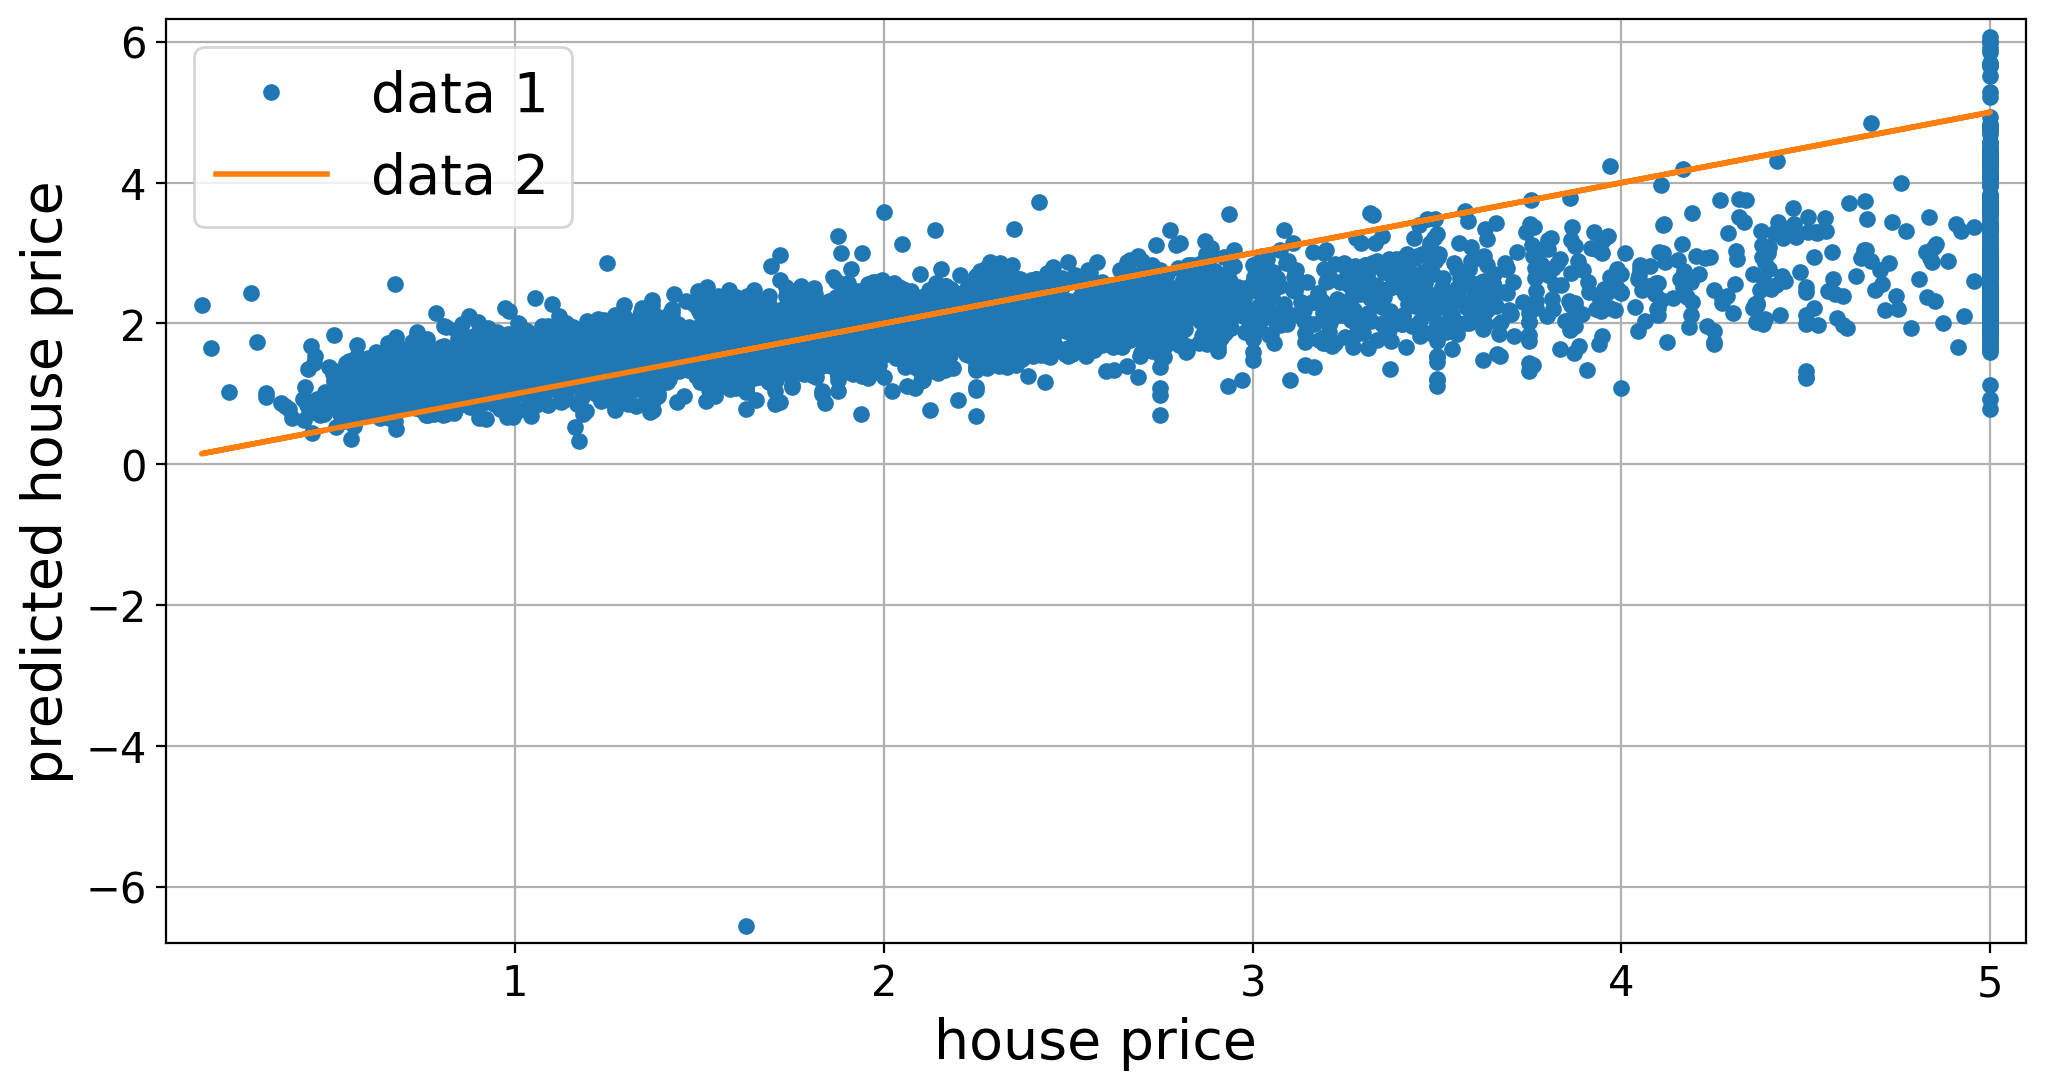

In [12]:
### plot prediction vs target
plot_res([y_test, y_test],[y_prediction, y_test], is_data_list=True, data_style=[[5,0], [0,2]])

### Diskusion der Ergebnisse: 
#### 1. Es wurde eine Gerade gefunden, die die Daten in Ordnung darstellt
#### 2. Ganz rechts gibt es einen Cut Off, d.h. eine Grenze der Daten --> diese werden wir noch später entfernen, weil es Ausreißer sind
#### 3. Der Score liegt etwa bei 0.53, wobei Ziel von r**2 = 1 ist. Wir können also etwa 50% der Daten replizieren   --> Scheiß Modell!
